In [460]:
import pandas as pd
import torch
import numpy as np

In [461]:
df = pd.read_csv("./diabetes.csv")
df.head()
df.drop(columns=['Outcome'])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [462]:
df.corr()['Outcome']
df.shape

(768, 9)

In [463]:
# import seaborn as sns

# sns.pairplot(df, hue='Outcome')

In [464]:
from torch.utils.data import Dataset, DataLoader


class Transform():

    def __init__(self):
        pass

    def __call__(self, sample):
        return (torch.from_numpy(sample[0]), torch.from_numpy(sample[1]))


class CSVDataSet(Dataset):

    def __init__(self, data_frame, target_column, transform=None):
        self.features = data_frame.drop(columns=[target_column]).values.astype(
            np.float32)
        self.target = data_frame[target_column].values
        self.target = self.target.reshape(-1, 1)
        self.transform = transform

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, index):
        if self.transform:
            return self.transform((self.features[index], self.target[index]))
        else:
            return (self.features[index], self.target[index])

In [465]:
csvDataSet = CSVDataSet(data_frame=df,
                        target_column='Outcome',
                        transform=Transform())

In [466]:
from torch.utils.data import random_split

random_state = 42
gen = torch.Generator().manual_seed(random_state)
test_size = 0.2
train_data, test_data = random_split(
    csvDataSet,
    [round((1 - test_size) * df.shape[0]),
     round(test_size * df.shape[0])],
    generator=gen)
batch_size = 1
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_data, batch_size=batch_size)

In [467]:
import torch.nn as nn
import torch.nn.functional as F


class Ann_Model(nn.Module):

    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        super(Ann_Model,self).__init__()
        self.input_layer = nn.Linear(n_input, n_hidden1)
        self.h1 = nn.Linear(n_hidden1, n_hidden2)
        self.output = nn.Linear(n_hidden2, n_output)

    def forward(self, x):
        inp_out = F.relu(self.input_layer(x))
        h1_out = F.relu(self.h1(inp_out))
        return self.output(h1_out).reshape(1,-1)

In [468]:
csvDataSet[0][0].shape

torch.Size([8])

In [469]:
model = Ann_Model(8, 20, 20, 2)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [478]:
losses=[]
for features, labels in train_data:
    optimizer.zero_grad()
    Y_pred = model(features)
    loss = loss_function(Y_pred,labels)
    loss.backward()
    losses.append(loss.item())
    optimizer.step()
    print(f"loss: {loss.item()}")

loss: 0.5275894403457642
loss: 0.4147396683692932
loss: 0.46631649136543274
loss: 0.4141882658004761
loss: 0.41291481256484985
loss: 0.41105806827545166
loss: 2.495779037475586
loss: 0.8126944899559021
loss: 0.7758638858795166
loss: 0.6780804395675659
loss: 0.7366117835044861
loss: 0.41820135712623596
loss: 0.4497568607330322
loss: 0.5700603127479553
loss: 0.435293048620224
loss: 0.4146593511104584
loss: 0.910063624382019
loss: 0.41142138838768005
loss: 0.4344728887081146
loss: 0.43332210183143616
loss: 0.40541407465934753
loss: 0.3903607130050659
loss: 0.9697927832603455
loss: 1.1150349378585815
loss: 0.47826674580574036
loss: 1.11824631690979
loss: 0.3961811065673828
loss: 1.1180155277252197
loss: 1.1158661842346191
loss: 1.1112943887710571
loss: 0.4862377643585205
loss: 0.8454143404960632
loss: 0.40794920921325684
loss: 0.8144122958183289
loss: 1.0843919515609741
loss: 0.4163132309913635
loss: 0.4189661145210266
loss: 0.9788223505020142
loss: 0.6572529077529907
loss: 0.4261957108974

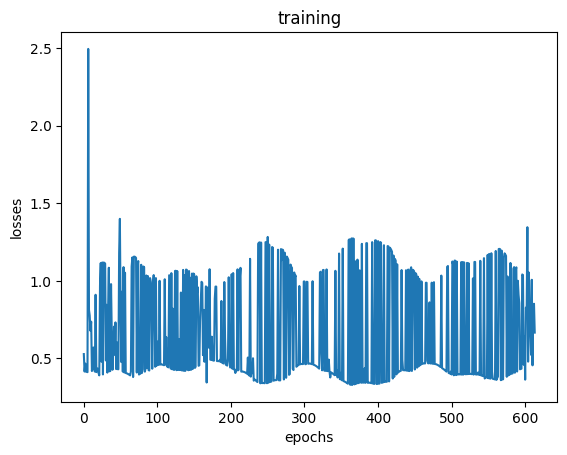

In [479]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("epochs")
plt.ylabel("losses")
plt.title("training")
plt.show()

In [489]:
Y_pred=[]
Y_org=[]
with torch.no_grad():
    for data,labels in test_data:
        print(labels[0].item())
        Y_org.append(labels[0].item())
        Y_pred.append(model(data).argmax().item())

0
0
0
0
0
0
0
1
1
1
0
0
0
1
1
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
1
1
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
1
0
1
0
0
0
1
0
1
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
1
1
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
0
0
1
0
0
0
0
1
1
0


In [490]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_org)

0.7012987012987013